# Interpolation:

## 1. Newton interpolation

$f(x)=a_0+a_1(x-x_0)+a_2(x-x_0)(x-x_1)+...+a_n(x-x-0)...(x-x_n)$

Divided differences:

$f(x_1,x_0)=\frac{y_1-y_0}{x_1-x_0}$


In [1]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt

### Example:

Find the polynomial function that goes through all the following data points:

$x= [-8,-5, -1, 0, 2, 4]$

$y= [-4,-2, 6, 1, 3, 5]$

In [3]:
# We need the vectors
x = np.array([-8,-5,-1,0,2,4])
y = np.array([-4,-2,6,1,3,5])

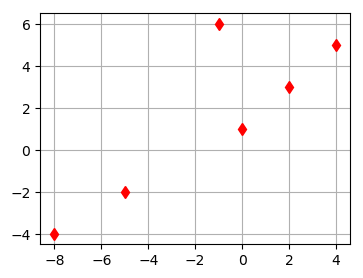

In [9]:
# Plotting

plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " ")
plt.grid()
plt.show()

### Costruct our own interpolator

In [10]:
# Function for the divided differences

def div_diff(x_values, y_values):
    """
    This is function that computes the divided differences.
    Inputs: data vectors
    Outputs: coefficients of the polynomial
    """
    # We get the length of the vectors
    n = len(x_values)
    
    # We need an empty array to host the coefficients
    a_coef = np.zeros([n, n])
    
    # First we place the y values onto the 1st column
    a_coef[:,0] = y_values
    
    # We iterate obver the indices of the matrix
    for j in range(1, n):
        for i in range(n - j):
            
            a_coef[i][j] = (a_coef[i + 1][j - 1]\
            - a_coef[i][j - 1]) / (x_values[i + j] - x_values[i])
        
    return a_coef

In [21]:
# Now we need a function to evalue the polynomial

def newton_polynomial(coef, x_values, x_new):
    """
    Function to evaluate the Newton polynomial at specific 
    x_new values (which are a new x axis)
    """
    n = len(x_values) - 1 
    newton = coef[n]
    
    for k in range(1, n + 1):
        newton = coef[n - k] + (x_new - x_values[n - k])*newton
    
    return newton


In [24]:
# Call our functions
# First we get the coefficients
a_coef_matrix = div_diff(x, y)

print(a_coef_matrix)

[[-4.          0.66666667  0.19047619 -0.19880952  0.06845238 -0.01390542]
 [-2.          2.         -1.4         0.48571429 -0.0984127   0.        ]
 [ 6.         -5.          2.         -0.4         0.          0.        ]
 [ 1.          1.          0.          0.          0.          0.        ]
 [ 3.          1.          0.          0.          0.          0.        ]
 [ 5.          0.          0.          0.          0.          0.        ]]


In [25]:
# We want the first row:
a_coef1 = div_diff(x, y)[0,:]
print(a_coef1)

# Now we call our Newton polynomial function
x_new1 = np.arange(-8., 4.1, 0.1)
y_new1 = newton_polynomial(a_coef1, x, x_new1)

[-4.          0.66666667  0.19047619 -0.19880952  0.06845238 -0.01390542]


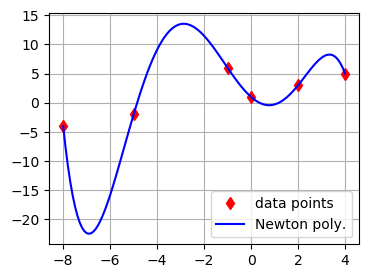

In [30]:
# Plotting the result

plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")

plt.grid()

plt.legend()
plt.show()



## 2. Lagrange interpolation


We will use scipy.interpolate.lagrange for this.



In [31]:
import scipy.interpolate as interp

In [35]:
# Now we call the lagrange function
lagrange_poly =interp.lagrange(x, y)

print(type(lagrange_poly))

print(lagrange_poly)

<class 'numpy.poly1d'>
          5           4          3         2
-0.01391 x - 0.09841 x + 0.4119 x + 1.953 x - 3.544 x + 1


In [46]:
lagrange_poly(x_new1)

array([ -4.        ,  -7.64465153, -10.81123956, -13.53016709,
       -15.83077181, -17.7413427 , -19.28913676, -20.50039572,
       -21.40036267, -22.01329878, -22.3625    , -22.47031371,
       -22.35815543, -22.0465255 , -21.55502578, -20.9023763 ,
       -20.106432  , -19.18419936, -18.15185314, -17.02475302,
       -15.81746032, -14.54375466, -13.21665067, -11.84841466,
       -10.45058133,  -9.03397042,  -7.60870343,  -6.18422027,
        -4.769296  ,  -3.37205746,  -2.        ,  -0.66000414,
         0.64164775,   1.89925471,   3.10768057,   4.26233724,
         5.359168  ,   6.39463084,   7.36568178,   8.26975814,
         9.1047619 ,   9.86904301,  10.56138267,  11.18097666,
        11.72741867,  12.20068359,  12.60111086,  12.92938771,
        13.18653257,  13.3738783 ,  13.49305556,  13.54597607,
        13.534816  ,  13.4619992 ,  13.33018057,  13.14222935,
        12.90121244,  12.61037772,  12.27313733,  11.89305105,
        11.47380952,  11.01921767,  10.5331779 ,  10.01

In [41]:
from numpy.polynomial.polynomial import Polynomial

In [44]:
# See only the coefficients

Polynomial(lagrange_poly.coef[::-1]).coef

array([ 1.        , -3.54351852,  1.95287698,  0.41188823, -0.0984127 ,
       -0.01390542])

In [48]:
# Get the y vector
y_new2 = Polynomial(lagrange_poly.coef[::-1])(x_new1)

#print(y_new2)

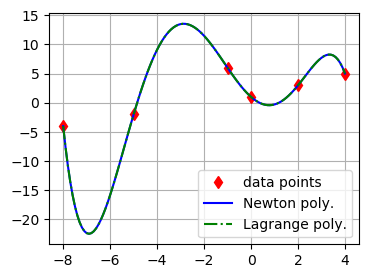

In [58]:
# Plotting the result

plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, y_new2, color = "green", linestyle = "-."\
        , label ="Lagrange poly.")

plt.grid()

plt.legend()
plt.show()



## II. Point to point interpolation:

For 1D data we can use the function **scipy.interpolate.interp1d()** to carry out interpolation of different orders.


See documentation here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html


Interpolation methods are useful for both time series and discrete data.

### 3. Linear interpolation:

In [64]:
# Call the interp.interp1d function

f_linear = interp.interp1d(x, y, kind = "linear")


print(type(f_linear))

print(f_linear)

# Get the actual values

#print(f_linear(x_new1))

y_new3 = f_linear(x_new1)

<class 'scipy.interpolate.interpolate.interp1d'>


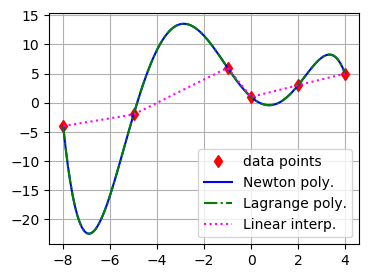

In [62]:
# Plotting the result

plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, y_new2, color = "green", linestyle = "-."\
        , label ="Lagrange poly.")
plt.plot(x_new1, y_new3, color = "magenta", linestyle = ":"\
        , label ="Linear interp.")

plt.grid()

plt.legend()
plt.show()



### 4. Quadratic interpolation:


In [65]:
f_quadratic = interp.interp1d(x, y, kind = "quadratic")

y_new4 = f_quadratic(x_new1)

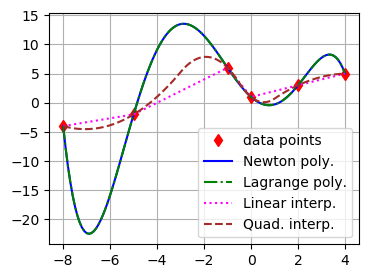

In [67]:
# Plotting the result

plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, y_new2, color = "green", linestyle = "-."\
        , label ="Lagrange poly.")
plt.plot(x_new1, y_new3, color = "magenta", linestyle = ":"\
        , label ="Linear interp.")
plt.plot(x_new1, y_new4, color = "brown", linestyle = "--"\
        , label ="Quad. interp.")

plt.grid()

plt.legend()
plt.show()



### 5. Point to point Spline interpolation with interpolate.splrep() and interpolate.splev()

See documentation: 

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splrep.html#scipy.interpolate.splrep

https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splev.html#scipy.interpolate.splev

In [71]:
# First we call splrep

tck = interp.splrep(x, y, s=0, k=3)

print("knots:", tck[0])
print("coefs:", tck[1])
print("k (degree):", tck[2])

knots: [-8. -8. -8. -8. -1.  0.  4.  4.  4.  4.]
coefs: [ -4.         -16.30684444  20.91352381  -7.16540952   9.77693968
   5.           0.           0.           0.           0.        ]
k (degree): 3


In [73]:
# Call the splev function to get the splines

y_new5 = interp.splev(x_new1, tck, der = 0)

print(x_new1.shape, y_new5.shape)

(121,) (121,)


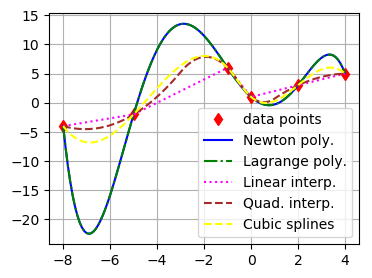

In [74]:
# Plotting the result

plt.figure(figsize=(4,3))

plt.plot(x, y, marker = "d", color = "red", linestyle = " "\
        , label = "data points")
plt.plot(x_new1, y_new1, color = "blue", linestyle = "-"\
        , label ="Newton poly.")
plt.plot(x_new1, y_new2, color = "green", linestyle = "-."\
        , label ="Lagrange poly.")
plt.plot(x_new1, y_new3, color = "magenta", linestyle = ":"\
        , label ="Linear interp.")
plt.plot(x_new1, y_new4, color = "brown", linestyle = "--"\
        , label ="Quad. interp.")

plt.plot(x_new1, y_new5, color = "yellow", linestyle = "--"\
        , label ="Cubic splines")

plt.grid()

plt.legend()
plt.show()

